In [2]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH273 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. ```CW_2_Class.ipynb``` <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! At the moment, though, you'll have to tunnel through the campus network via VPN (see [here](https://warwick.ac.uk/services/its/servicessupport/networkservices/vpn/))<br>
<div/>

# CH273: Computational Workshop 2
## Debye-Hückel theory

In this session, we are going to address some aspects of the Debye-Hückel theory for ionic solutions. Specifically, we shall assess its validity by making a comparison with experimental data. We are also going to discuss the physical meaning of a few quantities involved with the formulation of the theory

In [3]:
# Import a number of useful packages...
import numpy as np
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt

### Primitive model
The Debye-Hückel theory is based on the so-called "primitive model" of an ionic solution. To be specific, we shall condier a diluted acqueous solution of a strong electrolyte, say, NaCl. Ions (Na$^{+}$ and Cl$^{-}$) are assumed to be hard spheres of diameters $\sigma_+$ and $\sigma_-$ with a point charge at their center. The solvent, water, can be representend by a continuos medium of uniform dielectric constant $\epsilon$ - the same $\epsilon$ as the ions (gross oversimplification). Finally, we will take into account 1:1 electrolytes XY (X=cation, Y=anion).

### Debye-Hückel (limiting) law
This is the expression of the Debye-Hückel (limiting) law:

$$
\large{\ln\gamma_{\pm}=-A|z_+ z_-| \sqrt{I}}, \text{ with } I=\frac{1}{2}\sum_i m_i z_i^2=[C_i] \text{}
$$
where $\gamma_{\pm}$ is the mean ionic activity, A is a constant (more on that later...), and z$_\pm$ is the charge number ($z_i=q_i/e$, i.e. the charge number is equal to the actual charge of the ion [in Coulomb, C] divided by the elementary charge [also in C, so that $z_i$ is a dimensionless integer number]). $I$ is the ionic strength, which depends on the concentration of the ions, $m_i$, here expressed in [mol/Kg]. Note that for a 1:1 electrolyte (such as sodium chloride), where each ion is singly-charged (i.e. Na$^+$, Cl$^-$), the ionic strength $I$ is equal to the concentration of either Na$^+$ or Cl$^-$.

As a first step, we shall plot $\ln\gamma_{\pm}$ as a function of $\sqrt{I}$, which sould give us a straight line...

In [4]:
# Debye-Hückel - Electrochemistry
c=np.arange(0, 100, dtype=float)
nc=len(c)

# Ionic strength, [mol/Kg]
ist=np.zeros(100)
lg=np.zeros(100)
A=1.172 # Value of A tipically used for water at room temperature [Kg/mol]^{1/2}
for i in range(0,nc):
    ist[i]=c[i] # Ionic strength = concentration (in this case!) [mol/Kg]^{1/2}
    lg[i]=-A*np.sqrt(ist[i]) # Log (base e) of the mean activity coefficient

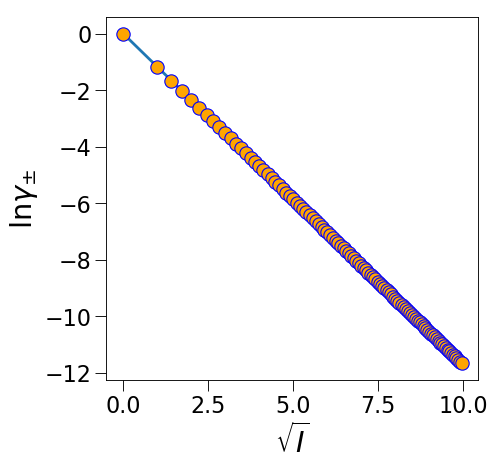

In [5]:
# Plot the log(base e) of the mean activity coefficient as a function of the (square root of) the ionic strength
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot((np.sqrt(ist[:])), (lg[:]), linewidth=2.5)
plt.plot((np.sqrt(ist[:])), (lg[:]), 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         li newidth=2.5)
plt.xlabel('$\sqrt{I}$', fontsize=26)
plt.ylabel('$\ln\gamma_{\pm}$', fontsize=26)
plt.show()

Is this result compatible with the experimental reality? To answer this, question, we plot the prediction of the Debye-Hückel limiting equation together with the experimentally measured activity of Na$^+$ ions in water - at the same conditions in terms of e.g. temperature and pressure

In [8]:
# Experimentally measured activity of Na$^+^ ions in water 

# Import the experimental data
# Column 1: ionic strength [mol/Kg]
# Column 2: activity coefficient 
act_exp_na=np.loadtxt('act.dat')

<div class=warn>
    
Plot on the same graph the prediction of the Debye-Hückel limiting equation (discussed above) together with the experimentally measured activity of Na$^+$ ions in water (which we have just imported). You may want to restrict the plot to the region where we actually have experimental data. This can be achieved by setting the lower and upper boundaries of the x and y axes of the plot. See e.g. : [https://plot.ly/matplotlib/axes/#setting-axes-fixed-range-with-xlim-and-ylim]
<div/>

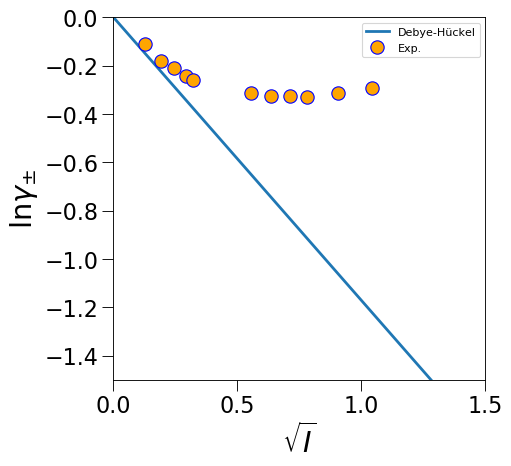

In [22]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot((np.sqrt(ist[:])), (lg[:]), linewidth=2.5, label="Debye-Hückel")
plt.plot((np.sqrt(act_exp_na[:,0])), (np.log(act_exp_na[:,1])), 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5, label='Exp.')
# Note that we have taken the log(base e) of the experimental activity coefficient - so that we can compare it with our
# Debye-Hückel result
plt.xlabel('$\sqrt{I}$', fontsize=26)
plt.ylabel('$\ln\gamma_{\pm}$', fontsize=26)

# Restrict the plot to the region where we have experimental data
plt.xlim(0, 1.5) 
plt.ylim(-1.5,0)
plt.legend()
plt.show()

### Beyond the Debye-Hückel limiting equation
The Debye-Hückel limiting law can only be applied to *very* low ionic strengths. This is the reason why a whole array of different expressions to model the ionic activity have been proposed throughout the years. Some of these expressions are "empirical" (they do work, but why they look the way they do, it is not clear), some other originate from elegant frameworks such as Mayer's Ionic Solution Theory (see e.g. McQuarrie, pag. 340). Here, we are going to compare a few popular ones:


**1. Debye-Hückel**
$$ \large{\log \gamma_i = -A z^2 \sqrt{I}} $$

**2. Extended Debye-Hückel**
$$ \large{\log \gamma_i = -A z^2 \frac{\sqrt{I}}{1+Ba\sqrt{I}}} $$

**3. Güntelberg**
$$ \large{\log \gamma_i = -A z^2 \frac{\sqrt{I}}{1+\sqrt{I}}} $$

Note that we are considering the $\log_{10}$ of $\gamma$ now (makes the comparison easier; #Lazy), not $\log_{e}$ as we did up to now!

In [10]:
# Comparison of activity coefficients according to different approximations 

ios=np.zeros(100) # ionic strength = concentration for the primitive model, [mol/Kg]
nc=len(ios)
act=np.zeros((100,4)) # activity coefficients, numbering as above
ion_s_step=0.01 # delta ionic strength
A_du=0.509 # [mol^{-1/2} Kg^{1/2}] 
B_ex=0.3281 # [mol^{-1/2} Kg^{1/2} Å^{-1}]
a_ex=4 # [Å], for Na+

ion_comp=np.zeros(100)

for i in range(0,nc):
    ion_comp[i]=(i+1)*ion_s_step
    act[i,0]=-A_du*np.sqrt(ion_comp[i])
    act[i,1]=-A_du*((np.sqrt(ion_comp[i]))/(1+B_ex*a_ex*np.sqrt(ion_comp[i])))
    act[i,2]=-A_du*(((np.sqrt(ion_comp[i]))/(1+np.sqrt(ion_comp[i]))))

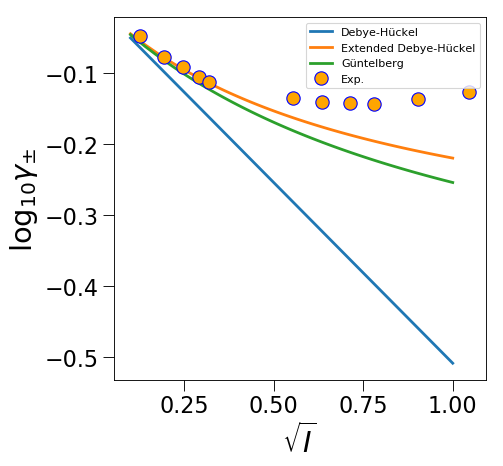

In [23]:
# Visualize the results
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot((np.sqrt(ion_comp[:])), (act[:,0]), linewidth=2.5, label='Debye-Hückel')
plt.plot((np.sqrt(ion_comp[:])), (act[:,1]), linewidth=2.5, label='Extended Debye-Hückel')
plt.plot((np.sqrt(ion_comp[:])), (act[:,2]), linewidth=2.5, label='Güntelberg')
plt.plot((np.sqrt(act_exp_na[:,0])), (np.log10(act_exp_na[:,1])), 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5, label='Exp.') # ionic strength in [mol/Kg], activity coefficient as they are (no log_10)
plt.xlabel('$\sqrt{I}$', fontsize=26)
plt.ylabel('$\log_{10}\gamma_{\pm}$', fontsize=26)
axes = plt.gca()
plt.legend()
plt.show()

<div class=warn>
    
Add to the plot above the prediction of the so-called Davies equation:

$$
\large{\log \gamma_i = -A z^2 \left ( \frac{\sqrt{I}}{1+\sqrt{I}} -0.2 \ I\right ) } 
$$

<div/>

In [12]:
ion_comp=np.zeros(100)

for i in range(0,nc):
    ion_comp[i]=(i+1)*ion_s_step
    act[i,0]=-A_du*np.sqrt(ion_comp[i])
    act[i,1]=-A_du*((np.sqrt(ion_comp[i]))/(1+B_ex*a_ex*np.sqrt(ion_comp[i])))
    act[i,2]=-A_du*(((np.sqrt(ion_comp[i]))/(1+np.sqrt(ion_comp[i]))))
    # Davies equation
    act[i,3]=-A_du*(((np.sqrt(ion_comp[i]))/(1+np.sqrt(ion_comp[i])))-0.2*ion_comp[i])

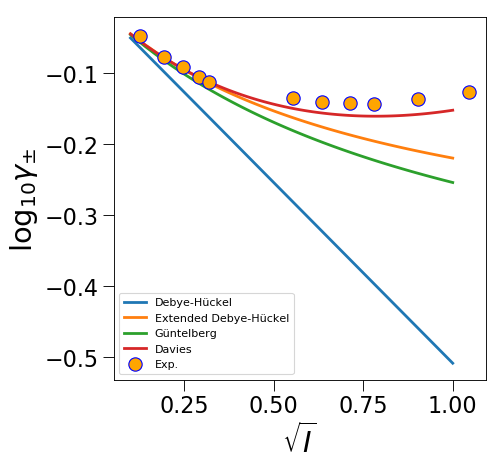

In [24]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot((np.sqrt(ion_comp[:])), (act[:,0]), linewidth=2.5, label='Debye-Hückel')
plt.plot((np.sqrt(ion_comp[:])), (act[:,1]), linewidth=2.5, label='Extended Debye-Hückel')
plt.plot((np.sqrt(ion_comp[:])), (act[:,2]), linewidth=2.5, label='Güntelberg')
# Davies equation
plt.plot((np.sqrt(ion_comp[:])), (act[:,3]), linewidth=2.5, label='Davies')
plt.plot((np.sqrt(act_exp_na[:,0])), (np.log10(act_exp_na[:,1])), 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5, label='Exp.') # ionic strength in [mol/Kg], activity coefficient as they are (no log_10)
plt.xlabel('$\sqrt{I}$', fontsize=26)
plt.ylabel('$\log_{10}\gamma_{\pm}$', fontsize=26)
axes = plt.gca()
plt.legend()
plt.show()

### The constant (?) A 
Statistical mechanics tells us that $A$ is not really a constant, but a quantity that:
* Depends on a number of variables, such as the density and the dielectric constant of the solvent, the temperature...
* Is related to the Debye screening length $\kappa^{-1}$, which has a precise physical meaning - it is a measure of the extent of the ionic atmosphere 

In SI units $A$ can be defined as:

$$
\large{A=\frac{e^3}{4\pi}\cdot\sqrt{\frac{\rho_\text{Solv.} N_A}{2 \epsilon_0^3 \epsilon_r^3 k_B^3 T^3}}}
$$

In [14]:
# Verify that the formula above is consistent with the value of A used in electrochemistry
e=1.602176634e-19 # elementary charge, [C]
pi=3.14159265359
n_a=6.022140857e23 # Avogadro's number [mol^{-1}]
epsilon_z=8.854187817620e-12 # Dielectric constant of vacuum [C^{2} N^{-1} m^{-2}]
epsilon_r=78.5 # Dielectric constant of water, room temperature, ambient pressure
T=298 # [K]
kb=1.38064852e-23 # [ J K^{-1}] -> [N m K^{-1}]
w_dens=997.047 # [Kg m^{3}]
f1=((e**3)/(4*pi))
f2=(n_a*w_dens)/(2*(epsilon_z**3)*(epsilon_r**3)*(kb**3)*(T**3))
A_sm=f1*np.sqrt(f2)
print("Electrochemistry:",A) # [mol^{-1/2} Kg^{1/2}]
print("StatMech:",A_sm) # [mol^{-1/2} Kg^{1/2}]
# Note that the concentration is expressed in mol^{1/2} Kg^{-1/2}

Electrochemistry: 1.172
StatMech: 1.1726351702974354


### The Debye screening length $\kappa^{-1}$
The Deby screening length $\kappa^{-1}$ for a 1:1 strong electrolyte in water (at room temperature and ambient pressure) is often calculated as:

$$
\large{\kappa^{-1}=\frac{0.304}{\sqrt{I}}}  \ \ \small{\text{(K.1)}}
$$

where $I$ is expressed in [mol/L] (for water, this is equivalent to [mol/Kg]) and the resulting value of $\kappa^{-1}$ is in nm.

Statistical mechanics offers us a more detailed picture, defining $\kappa^{-1}$ (SI units) as:

$$
\large{\kappa^{-1}=\sqrt{\frac{\epsilon_0\epsilon_r k_B T}{2e^2N_A\rho_{Solv.} I}} \cdot 10^{9}  } \ \ \small{\text{(K.2)}}
$$

where the $10^9$ factor is needed to convert the result from m to nm.

<div class=warn>

Calculate the value of the Debye screening length $\kappa^{-1}$ for a 1:1 electrolyte in water at room temperature and pressure, comparing the result obtained by using equation (K.1) and (K.2) above. Take I=0.01 [mol/Kg]
<div/>

In [15]:
# Debye screening length for water at 300 K

# (K.1) - Electrochemistry
ion_s= 0.01 # ionic strength = concentration for the primitive model, [mol/L] = [mol/Kg] (water dens=1)
dl_ele=0.304/(np.sqrt(ion_s)) # nm


# (K.2) - StatMech
dl_sm=np.sqrt(((epsilon_z*epsilon_r*kb*T)/(2*(e**2)*n_a*w_dens))*(1/ion_s))*1e9 # nm
print("(K.1) - Electrochemistry:",dl_ele) 
print("(K.2) - StatMech:",dl_sm)

(K.1) - Electrochemistry: 3.0399999999999996
(K.2) - StatMech: 3.0457919150061867


### What about the "screening"?
Broadly speaking, we can define as screening the damping of the electric field generated by a certain charge $q_i$ - due to the effect of some other surrounding charges ${q_j}$. It is the same effect taking place with respect to the screening of the nuclear charges by inner electrons in atoms (hence Madelung's rule!). In the context of electrochemistry, the more ionic species you have in solution, the more a certain charge will be surrounded by counter-ions. 

In turn, the more counter-ions surrounding the charge, the more the electric field generated by the latter will be "screened". As the Debye screening length is a measure of the ionic atmosphere, which represents the exent to which a certain charge can attract counter-ions, the higher the ionic strength (and thus the concentration, and thus the amount of counter-ions surrounding the charge in question) the smaller the Debye screening length. Is this true? Let us have a look...

In [16]:
# Debye screening length for water at 300 K - as a function of the ionic strength 

# StatMech
dl_sm_c=np.zeros(100) # Debye screening length, nm
ion_s_c=np.zeros(100) # ionic strength = concentration for the primitive model, [mol/Kg]
nc=len(dl_sm_c)

ion_s_step=0.01 # delta ionic strength

for i in range(0,nc):
    ion_s_c[i]=(i+1)*ion_s_step
    dl_sm_c[i]=np.sqrt(((epsilon_z*epsilon_r*kb*T)/(2*(e**2)*n_a*w_dens))*(1/ion_s_c[i]))*1e9

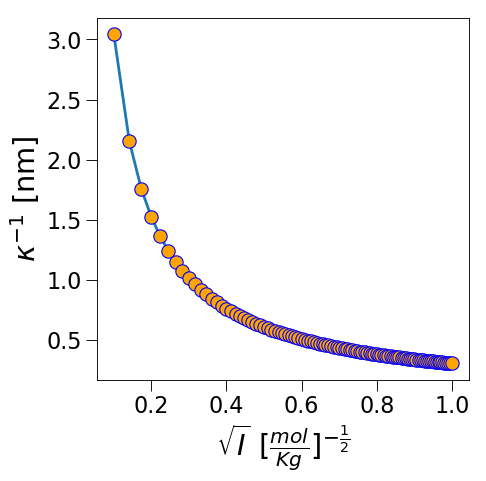

In [17]:
# Plot the log(base e) of the mean activity coefficient as a function of the (square root of) the ionic strength
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot((np.sqrt(ion_s_c[:])), (dl_sm_c[:]), linewidth=2.5)
plt.plot((np.sqrt(ion_s_c[:])), (dl_sm_c[:]), 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)
plt.xlabel('$\\sqrt{I}  \ [\\frac{mol}{Kg}]^{-\\frac{1}{2}}$',fontsize=26)
plt.ylabel('$\\kappa^{-1}$ [nm]',fontsize=26)
plt.show()

### The Bjerrum length
Another interesting quantity related to $\kappa$ is the so-called Bjerrum length ($\lambda_B$, [m]), which represents the separation at which the electrostatic interaction between two elementary charges is comparable (in magnitude) to the thermal energy:

$$
\lambda_B=\frac{e^2}{4\pi\epsilon_0\epsilon_r k_B T}
$$

<div class=warn>

Demonstrate (via dimensional analysis, see e.g. [https://en.wikipedia.org/wiki/Dimensional_analysis#Checking_equations_that_involve_dimensions]) that the  Bjerrum length has indeed the dimensions of a length [m]
<div/>

$$
\lambda_B=\frac{[C]^2}{[C^2N^{-1}m^{-2}]\cdot[Nm K^{-1}][K]} = [m]
$$

<div class=warn>

Calculate the value of $\lambda_B$ for water at room temperature
<div/>

In [18]:
lambda_b=(e**2/(4*pi*epsilon_z*epsilon_r*kb*T))*1e9
print(lambda_b, 'nm')

0.7143205441887662 nm


The Debye-Hückel theory is a (mean-field) theory valid when the ion-ion separation is far greater than $\lambda_B$: in tha case, the Coulomb interactions can be treated as a perturbation to ideal gas behaviour. Therefore, the Debye-Hückel theory is only applicable for (very!) dilute electrolytes.

<div class=warn>

Consider a solution of NaCl in water (0.45 [mol/Kg]). Do you think we are dealing with a regime where the Debye-Hückel theory can safely be applied? Motivate your answer providing numerical evidence based on $\lambda_B$.
<div/>

In [19]:
# 0.45 mol/Kg of NaCl -> 0.45 mol Na+
conc=0.45
bj=np.cbrt(1/(conc*n_a*w_dens*10e-27))
print("(average) Ion-ion separation for NaCl in water, 0.45 mol/Kg: ", bj)
print("Bjerrum length for water at room temperature: ",lambda_b)

(average) Ion-ion separation for NaCl in water, 0.45 mol/Kg:  0.7179711308866835
Bjerrum length for water at room temperature:  0.7143205441887662


In this case, the average ion-ion distance is similar to $\lambda_B$, which implies that the Debye-Hückel theory cannot be applied.